In [282]:
# basic
import warnings
import numpy as np
import pandas as pd 
import datetime as dt 
warnings.filterwarnings('ignore')

# Main Datasource
import yfinance as yf
from pandas_datareader import data as pdr 

# Plot Figure
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates

In [219]:
wiki = 'https://en.wikipedia.org/wiki/'
tickersDOW = pd.read_html(wiki+'List_of_S%26P_500_companies')[0]['Symbol'].to_list()
print(tickersDOW)

['MMM', 'ABT', 'ABBV', 'ABMD', 'ACN', 'ATVI', 'ADBE', 'AMD', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BKR', 'BLL', 'BAC', 'BBWI', 'BAX', 'BDX', 'BRK.B', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'BF.B', 'CHRW', 'CDNS', 'CZR', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CERN', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'COO', 'CPRT', 'GLW', 'CTVA', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', '

# Ratio Data - From CRSP Database 

In [228]:
Ratio_DF = pd.read_excel(r'/Users/chen-lichiang/Desktop/python/Factor_Analysis/SP500.xlsx')
Ratio_DF = Ratio_DF.fillna(value=0)
Ratio_DF

,CRSP PERMNO,Fiscal year end,Fiscal quarter end,Public Date,Operating Profit Margin Before Depreciation,Gross Profit Margin,Cash Flow Margin,ROA,ROE,ROIC,Gross Profit/Total Assets,Ticker
0,10104,2009-05-31 00:00:00,2009-11-30,2010-01-31,0.475608,0.821658,0.337352,0.232346,0.231894,0.182738,0.383200,ORCL
1,10104,2009-05-31 00:00:00,2009-11-30,2010-02-28,0.475608,0.821658,0.337352,0.232346,0.231894,0.182738,0.383200,ORCL
2,10104,2009-05-31 00:00:00,2009-11-30,2010-03-31,0.475608,0.821658,0.337352,0.232346,0.231894,0.182738,0.383200,ORCL
3,10104,2009-05-31 00:00:00,2010-02-28,2010-04-30,0.468274,0.816347,0.322344,0.227334,0.217642,0.170381,0.369531,ORCL
4,10104,2009-05-31 00:00:00,2010-02-28,2010-05-31,0.468274,0.816347,0.322344,0.227334,0.217642,0.170381,0.369531,ORCL
...,...,...,...,...,...,...,...,...,...,...,...,...
58394,93436,2019-12-31 00:00:00,2020-06-30,2020-08-31,0.132229,0.282562,0.111236,0.099814,0.053505,0.060509,0.203919,TSLA
58395,93436,2019-12-31 00:00:00,2020-06-30,2020-09-30,0.132229,0.282562,0.111236,0.099814,0.053505,0.060509,0.203919,TSLA
58396,93436,2019-12-31 00:00:00,2020-06-30,2020-10-31,0.132229,0.282562,0.111236,0.099814,0.053505,0.060509,0.203919,TSLA
58397,93436,2019-12-31 00:00:00,2020-09-30,2020-11-30,0.140439,0.290637,0.110945,0.111082,0.070189,0.067817,0.210805,TSLA


# Ratio Correlation Matrix

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'ROA'),
  Text(1.5, 0, 'ROE'),
  Text(2.5, 0, 'ROIC'),
  Text(3.5, 0, 'Gross Profit Margin'),
  Text(4.5, 0, 'Cash Flow Margin'),
  Text(5.5, 0, 'Gross Profit/Total Assets')])

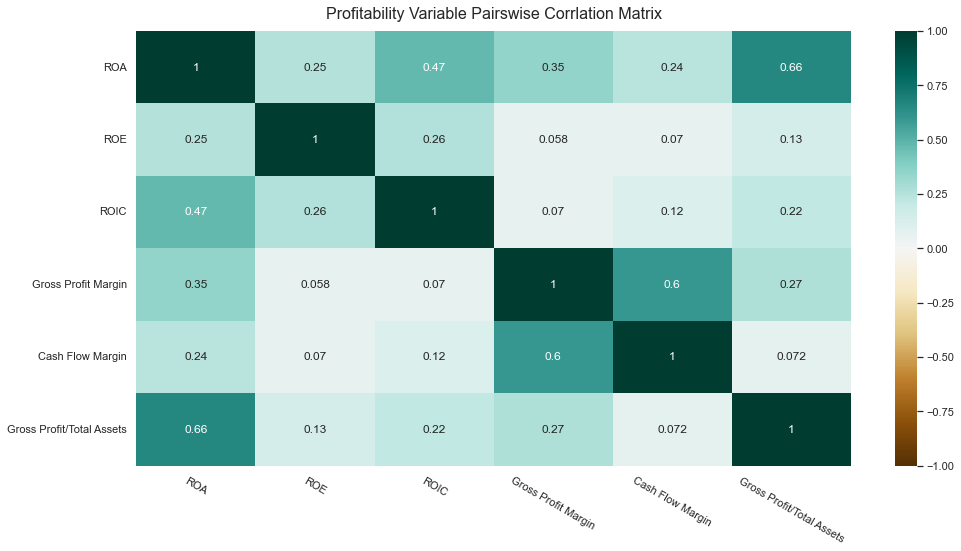

In [307]:
import seaborn as sns

# sns.set_theme(style="white")

corr = Ratio_DF[['ROA','ROE','ROIC','Gross Profit Margin','Cash Flow Margin','Gross Profit/Total Assets']].corr()

plt.figure(figsize=(16, 8))

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=True , cmap='BrBG' )
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Profitability Variable Pairswise Corrlation Matrix', fontdict={'fontsize':16}, pad=12) ;

plt.xticks(rotation=-30)


# Build Trading Signal 

Long  Top    25 % High Financial Ratio Characteristic Portfolio 

Short button 25 % High Financial Ratio Characteristic Portfolio 


In [248]:
Ratio_DF_groupby_date = Ratio_DF.groupby('Public Date')

date_list  = []
long_list  = []
short_list = []

for name,df in Ratio_DF_groupby_date : 

    df = df.sort_values(by='ROIC',ascending=False)
    Top_25_percent_ticker    =  df['Ticker'].to_list()[ : int(df.shape[0]*0.25)   ]
    Button_25_percent_ticker =  df['Ticker'].to_list()[ - int(df.shape[0]*0.25) : ]

    date_list.append(name + pd.Timedelta(days=2))
    long_list.append(Top_25_percent_ticker)
    short_list.append(Button_25_percent_ticker)


Trading_Signal = pd.DataFrame()
Trading_Signal['Date'] = date_list 
Trading_Signal['Long'] = long_list
Trading_Signal['Short'] = short_list

Trading_Signal

,Date,Long,Short
0,2010-02-02,"[SNSTA, MA, DPZ, PCLN, IT, GILD, LMT, CF, CL, ...","[STZ, COF, PFG, PXD, LVS, USB, BBT, BK, ZMH, H..."
1,2010-03-02,"[MCO, VRSK, SNSTA, MA, DPZ, PCLN, MRK, LMT, GI...","[COF, BWA, ATI, C, RHI, PNW, CCI, FIS, CME, VM..."
2,2010-04-02,"[MCO, VRSK, SNSTA, MA, DPZ, PCLN, MRK, LMT, GI...","[KR, BWA, ATI, C, RHI, PNW, CCI, FIS, CME, VMC..."
3,2010-05-02,"[MCO, VRSK, SNSTA, MA, DPZ, PCLN, MRK, LMT, GI...","[WYNN, COF, KR, BWA, MU, ATI, C, RHI, PNW, CCI..."
4,2010-06-02,"[MCO, DPZ, SNSTA, MA, PCLN, TJX, LMT, GILD, IT...","[POOL, CBS, MHK, SWK, URI, LNC, DUK, NDAQ, EOG..."
...,...,...,...
127,2020-09-02,"[VRSN, HPQ, DPZ, NRG, SPGI, YUM, MA, IDXX, CTX...","[WMB, KMI, WBA, LUV, F, GLW, GM, NI, CTVA, STZ..."
128,2020-10-02,"[VRSN, DPZ, HPQ, NRG, SPGI, YUM, MA, IDXX, CTX...","[RL, WMB, KMI, WBA, LUV, F, GLW, GM, NI, CTVA,..."
129,2020-11-02,"[VRSN, DPZ, HPQ, NRG, SPGI, YUM, MA, IDXX, CTX...","[IQV, RL, WMB, KMI, WBA, LUV, F, GLW, GM, NI, ..."
130,2020-12-02,"[VRSN, HPQ, DPZ, NRG, SPGI, YUM, IDXX, PM, AZO...","[KMI, DISH, GLW, CTVA, COF, FCX, FISV, PXD, PR..."


In [252]:
start_date = '2010-01-01'
end_date   = '2021-06-30'
# yfinance likes the tickers formatted as a list
ticks = yf.Tickers(list(set(Ratio_DF['Ticker'].to_list())))
Stock_DF = ticks.history(start=start_date, end=end_date).Close
Stock_DF = Stock_DF.fillna(method='bfill')

# Market
Market = yf.Ticker("^GSPC")
Market_DF = Market.history(start=start_date, end=end_date).Close

Stock_DF

[*********************100%***********************]  521 of 521 completed

38 Failed downloads:
- WMIH: No data found for this date range, symbol may be delisted
- LKQX: No data found for this date range, symbol may be delisted
- HRS: No data found, symbol may be delisted
- CBS: No data found, symbol may be delisted
- RFMD: No data found for this date range, symbol may be delisted
- UAUA: No data found for this date range, symbol may be delisted
- HANS: No data found for this date range, symbol may be delisted
- ERI: No data found, symbol may be delisted
- BZC: No data found, symbol may be delisted
- Q: No data found for this date range, symbol may be delisted
- WAG: No data found for this date range, symbol may be delisted
- KFT: No data found for this date range, symbol may be delisted
- BF: No data found for this date range, symbol may be delisted
- CBG: No data found for this date range, symbol may be delisted
- PIR: No data found, symbol may be delisted
- GDI: No data found, symbol

,A,AA,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ADBE,...,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZMH
Date,,,,,,,,,,,,,,,,,,,,,
2009-12-31,20.311485,35.840561,4.562869,38.758690,6.462007,24.234324,21.787306,8.730000,19.677299,36.779999,...,38.204315,14.068974,19.580614,43.636875,32.621964,21.106518,20.003937,54.410458,28.350000,NaN
2010-01-04,20.461842,37.018936,4.496877,38.662952,6.562588,24.234324,22.255314,8.740000,19.848587,37.090000,...,41.963715,13.976154,19.830650,44.251202,32.770359,21.106518,20.072580,55.248096,28.670000,NaN
2010-01-05,20.239580,35.862804,5.005958,38.433125,6.573934,24.234324,22.096531,8.530000,19.688229,37.700001,...,44.515919,13.810399,19.580614,44.423988,32.380798,21.106518,20.003937,56.997051,28.620001,NaN
2010-01-06,20.167665,37.730427,4.798555,38.768265,6.469367,24.234324,21.887600,8.400000,19.797567,37.619999,...,43.932003,13.836919,19.447790,44.807938,32.594131,21.106518,19.860929,56.978630,28.400000,NaN
2010-01-07,20.141512,36.930012,4.939964,38.758690,6.457408,24.234324,21.536596,8.400000,19.961573,36.889999,...,44.870216,13.777251,19.252449,44.667160,33.020802,21.106518,19.855206,58.285728,27.690001,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-23,146.863846,35.040001,22.200001,199.736679,133.499985,111.392639,115.385506,321.700012,109.994926,574.229980,...,125.949997,65.777809,130.860001,63.301884,63.842228,115.827393,116.505081,163.968597,502.880005,NaN
2021-06-24,146.295303,36.349998,22.350000,199.985458,133.210419,112.115707,115.056717,311.809998,110.848366,578.260010,...,124.150002,65.807602,133.710007,63.558002,63.652580,116.675613,116.554893,163.888840,510.390015,NaN
2021-06-25,146.903748,35.799999,22.219999,203.438629,132.910873,110.395973,115.913559,311.540009,111.860596,579.659973,...,124.059998,66.641861,132.119995,63.695919,64.061829,116.605766,116.813927,165.586151,510.649994,NaN


In [320]:
for i in range(Trading_Signal.shape[0]):
    
    
    if i == Trading_Signal.shape[0]-1 :
        break


    else:
        # ---------- Trading Signal ----------
        start_date  = Trading_Signal['Date'][i]
        end_date    = Trading_Signal['Date'][i+1]
        long_stock  = Trading_Signal['Long'][i]
        short_stock = Trading_Signal['Short'][i]
        
        index_list  = Stock_DF.index.to_list()

        days = 0

        while True :
            
            if start_date not in index_list : 

                start_date += pd.Timedelta(days=days)
            
            if start_date in index_list :
                start_index = index_list.index(start_date)
                days = 0
                break

            days+=1
        

        while True :
            
            if end_date not in index_list : 

                end_date += pd.Timedelta(days=days)
            
            if end_date in index_list :
                end_index = index_list.index(end_date)
                days = 0
                break

            days+=1
        
        
        # Long / short Portfolio
        period_long_portfolio         = Stock_DF[start_index:end_index][long_stock].pct_change()
        Low_Characteristic_portfolio  = Stock_DF[start_index:end_index][short_stock].pct_change()

        period_short_portfolio  = Stock_DF[start_index:end_index][short_stock] * -1 
        period_short_portfolio  = period_short_portfolio.pct_change()


        period_long_portfolio['Long Portfolio Return']      = period_long_portfolio.mean(axis=1)
        period_short_portfolio['Low Characteristic Return'] = Low_Characteristic_portfolio .mean(axis=1) 
        period_short_portfolio['Short Portfolio Return']    = period_short_portfolio.mean(axis=1) 
        period_portfolio        = pd.concat([period_long_portfolio,period_short_portfolio],axis=1)

        period_portfolio['Portfolio Return'] =  0.5 * period_long_portfolio['Long Portfolio Return'] + 0.5 * period_short_portfolio['Short Portfolio Return']

        period_portfolio = period_portfolio[['Long Portfolio Return','Low Characteristic Return','Short Portfolio Return','Portfolio Return']]

        if i == 0 : 
            Back_Testing_Portfolio   = period_portfolio
        else :
            Back_Testing_Portfolio = pd.concat([Back_Testing_Portfolio,period_portfolio ],axis=0)



# Back_Testing_Portfolio.replace([np.inf, -np.inf], np.nan, inplace=True)
Back_Testing_Portfolio = Back_Testing_Portfolio.fillna(value=0)
Back_Testing_Portfolio 

,Long Portfolio Return,Low Characteristic Return,Short Portfolio Return,Portfolio Return
Date,,,,
2010-02-02,0.000000,0.000000,0.000000,0.000000
2010-02-03,-0.005470,-0.010176,-0.010176,-0.007823
2010-02-04,-0.025293,-0.040944,-0.040944,-0.033118
2010-02-05,0.001225,0.005342,0.005342,0.003284
2010-02-08,-0.004174,-0.007814,-0.007814,-0.005994
...,...,...,...,...
2020-12-28,0.000600,0.000221,0.000221,0.000411
2020-12-29,-0.004565,-0.006579,-0.006579,-0.005572
2020-12-30,0.004051,0.012044,0.012044,0.008047


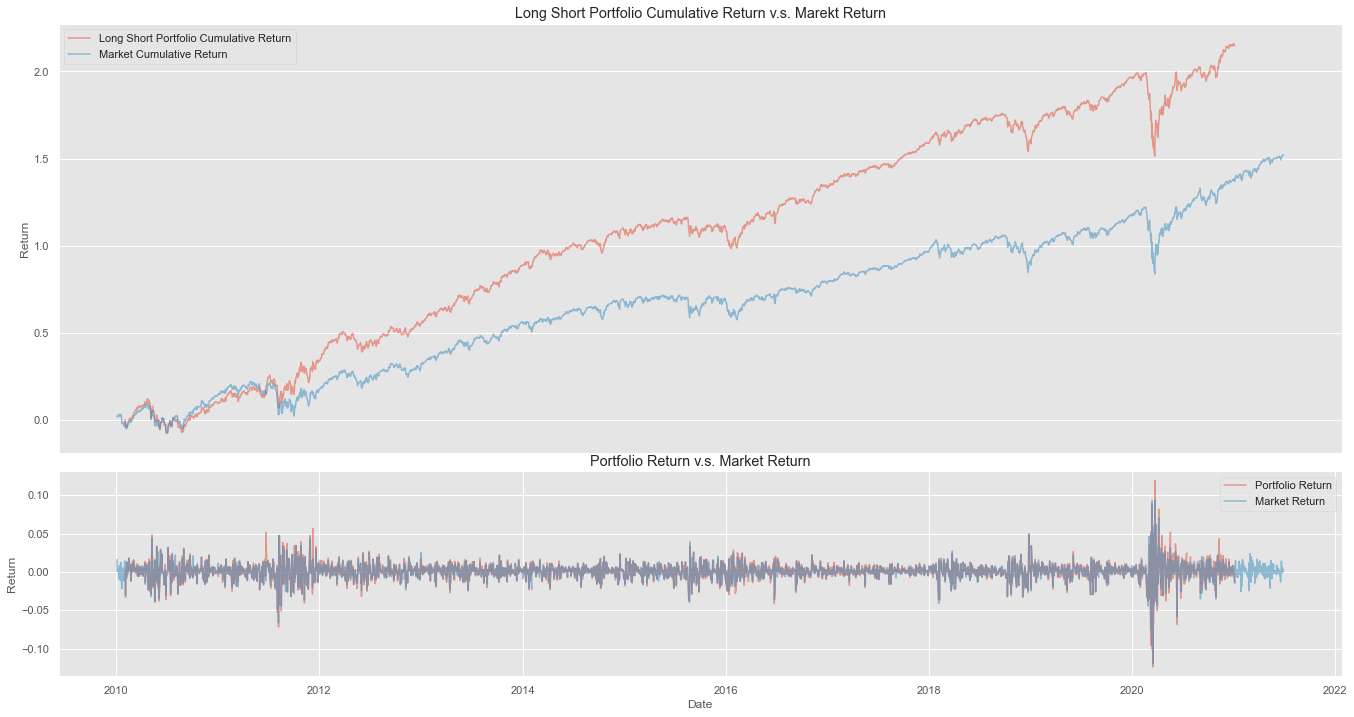

In [337]:
plt.style.use('ggplot')
plt.subplots(figsize=(23,12))

#  Return
# ax.plot(Back_Testing_Portfolio.index , Back_Testing_Portfolio['Portfolio Return'] ,label = 'Portfolio Return' , alpha=0.5 )
# ax.plot(Market_DF.index , Market_DF.pct_change() ,label = 'Market Return' , alpha=0.5 )

#  Cumulative Return

ax1 = plt.subplot2grid((6,1),(0,0),rowspan=4,colspan=1)
ax1.set_title(' Long Short Portfolio Cumulative Return v.s. Marekt Return ')
ax1.plot(Back_Testing_Portfolio.index , Back_Testing_Portfolio['Portfolio Return'].cumsum()        , label = 'Long Short Portfolio Cumulative Return' , alpha=0.5 )
ax1.plot(Market_DF.index , Market_DF.pct_change().cumsum(),label = 'Market Cumulative Return'      , alpha=0.5 )

plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
plt.ylabel('Return')
plt.xticks([])
plt.legend()


ax2 = plt.subplot2grid((6,1),(4,0),rowspan=2,colspan=1)

ax2.set_title('Portfolio Return v.s. Market Return')
ax2.plot(Back_Testing_Portfolio.index , Back_Testing_Portfolio['Portfolio Return'] ,label = 'Portfolio Return' , alpha=0.5 )
ax2.plot(Market_DF.index , Market_DF.pct_change() ,label = 'Market Return' , alpha=0.5 )
plt.ylabel('Return')
plt.xlabel('Date')
ax2.legend()


In [255]:
class Ken_French_Library():
    """
    Fama/French 3 Factors [Weekly]
    Fama/French 3 Factors [Daily]
    """

    def __init__(self,start,periods):

        self.start = start 
        self.periods = periods
    
    def get_data(self):

        research_factors = pdr.DataReader('F-F_Research_Data_Factors_'+str(self.periods),
                                      'famafrench', start=self.start)[0] 
        momentum_factor = pdr.DataReader('F-F_Momentum_Factor_daily',
                                     'famafrench', start=self.start)[0]

        five_factors = research_factors.join(momentum_factor).dropna()
        five_factors /= 100.
        five_factors.columns = five_factors.columns.str.strip()

        self.five_factors = pd.DataFrame(five_factors)
        
        return self.five_factors
    
        

    def __len__(self):
        return self.five_factors.shape[0]


Fama_French =  Ken_French_Library(start=dt.datetime(2008,1,1),periods='Daily')
FF_DF       =  Fama_French.get_data()
FF_DF

,Mkt-RF,SMB,HML,RF,Mom
Date,,,,,
2008-01-02,-0.0146,-0.0008,-0.0012,0.0001,0.0089
2008-01-03,-0.0014,-0.0102,-0.0042,0.0001,0.0163
2008-01-04,-0.0256,-0.0048,0.0005,0.0001,0.0060
2008-01-07,0.0016,0.0014,0.0020,0.0001,-0.0050
2008-01-08,-0.0181,-0.0043,-0.0093,0.0001,0.0100
...,...,...,...,...,...
2021-09-24,0.0008,-0.0046,0.0070,0.0000,0.0025
2021-09-27,-0.0010,0.0127,0.0239,0.0000,0.0067
2021-09-28,-0.0218,-0.0042,0.0175,0.0000,-0.0062


In [256]:
Back_Testing_Portfolio = pd.merge(FF_DF,Back_Testing_Portfolio,left_index=True,right_index=True)
Back_Testing_Portfolio

,Mkt-RF,SMB,HML,RF,Mom,Long Portfolio Return,Short Portfolio Return,Portfolio Return
Date,,,,,,,,
2010-02-02,0.0121,-0.0040,0.0064,0.0,0.0047,0.000000,0.000000,0.000000
2010-02-03,-0.0049,0.0005,-0.0037,0.0,0.0023,-0.005470,-0.010176,-0.007823
2010-02-04,-0.0314,-0.0013,-0.0118,0.0,-0.0156,-0.025293,-0.040944,-0.033118
2010-02-05,0.0029,-0.0003,0.0001,0.0,0.0005,0.001225,0.005342,0.003284
2010-02-08,-0.0079,0.0005,-0.0036,0.0,0.0001,-0.004174,-0.007814,-0.005994
...,...,...,...,...,...,...,...,...
2020-12-28,0.0046,-0.0073,0.0034,0.0,-0.0047,0.000600,0.000221,0.000411
2020-12-29,-0.0040,-0.0152,0.0023,0.0,-0.0041,-0.004565,-0.006579,-0.005572
2020-12-30,0.0027,0.0099,0.0006,0.0,-0.0027,0.004051,0.012044,0.008047


In [257]:
import statsmodels.api as sm 

def OLS_Linear_Regression(y,x,Print=None):

    # linear Regression
    x = sm.add_constant(x)
    model = sm.OLS(y,x)
    res   = model.fit()

    # Print Summary
    if Print :
        print(res.summary())
    
    return res


res = OLS_Linear_Regression(Back_Testing_Portfolio['Portfolio Return']-Back_Testing_Portfolio['RF'] ,Back_Testing_Portfolio[['Mkt-RF','SMB','HML']], Print=True)
res.params

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                 1.020e+04
Date:                Fri, 22 Oct 2021   Prob (F-statistic):               0.00
Time:                        21:56:46   Log-Likelihood:                 11719.
No. Observations:                2750   AIC:                        -2.343e+04
Df Residuals:                    2746   BIC:                        -2.341e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   6.53e-05      3.460      0.0

/Users/chen-lichiang/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const     0.000226
Mkt-RF    0.965304
SMB       0.144037
HML       0.180199
dtype: float64

In [283]:
Back_Testing_Portfolio_group = Back_Testing_Portfolio.rolling(window=252)

rolling_date  = []
rolling_alpha = []
rolling_tvalues = []

for df in Back_Testing_Portfolio_group :

    if df.shape[0] >= 252 :

        res   = OLS_Linear_Regression(df['Portfolio Return']-df['RF'] ,df[['Mkt-RF', 'SMB', 'HML']], Print=False)
        date  = df.index[0]
        alpha = res.params[0]
        tvalues = res.tvalues[0]

        rolling_date.append(date)
        rolling_alpha.append(alpha)
        rolling_tvalues.append(tvalues)

rolling_df = pd.DataFrame()
rolling_df['Date']        = rolling_date
rolling_df['Alpha']       = rolling_alpha 
rolling_df['T-statistic'] = rolling_tvalues 
rolling_df

,Date,Alpha,T-statistic
0,2010-02-02,-0.000376,-1.764242
1,2010-02-03,-0.000332,-1.587372
2,2010-02-04,-0.000309,-1.476907
3,2010-02-05,-0.000275,-1.309920
4,2010-02-08,-0.000267,-1.268443
...,...,...,...
2494,2019-12-30,-0.000027,-0.093471
2495,2019-12-31,-0.000017,-0.059954
2496,2020-01-02,-0.000010,-0.032877
2497,2020-01-03,0.000020,0.070844


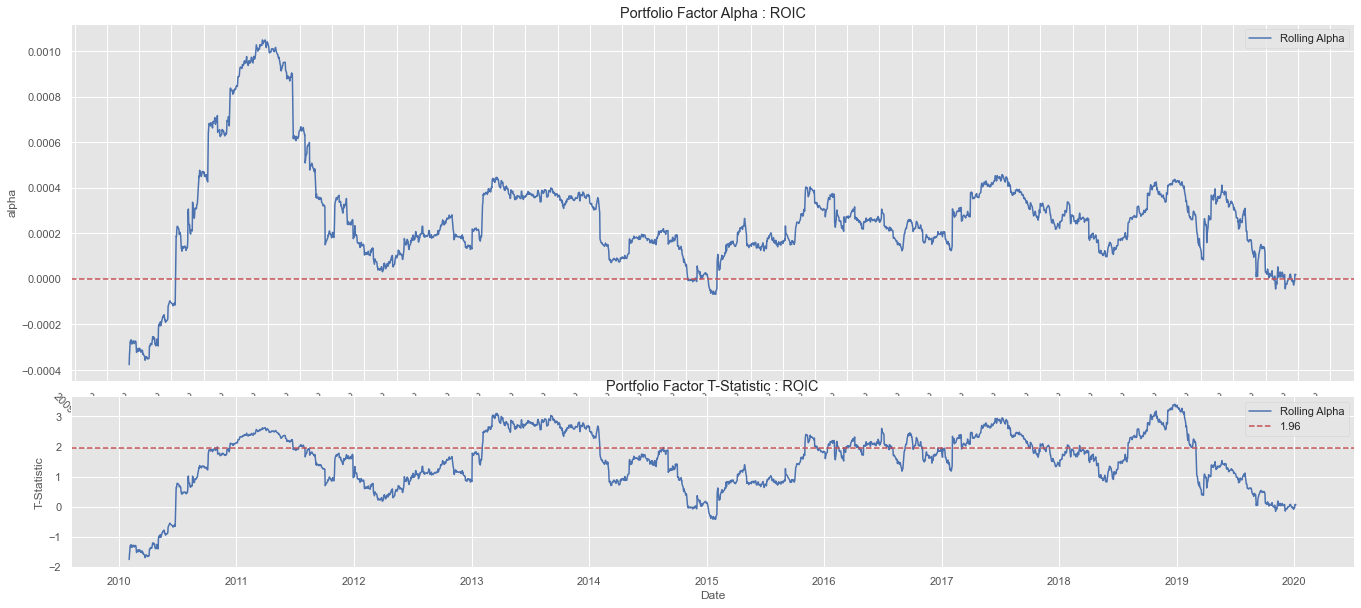

In [317]:
plt.style.use('ggplot')
plt.subplots(figsize=(23,10))


ax1 = plt.subplot2grid((6,1),(0,0),rowspan=4,colspan=1)

ax1.set_title('Portfolio Factor Alpha : ROIC')
ax1.plot(rolling_df['Date'],rolling_df['Alpha'],label='Rolling Alpha',color='b')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=100))
ax1.axhline(0,linestyle='--',color='r')
plt.xticks(rotation=-45)
ax1.set_ylabel('alpha')
ax1.set_xlabel('date')
ax1.legend()


ax2 = plt.subplot2grid((6,1),(4,0),rowspan=3,colspan=1)

ax2.set_title('Portfolio Factor T-Statistic : ROIC')
ax2.plot(rolling_df['Date'],rolling_df['T-statistic'],label='Rolling Alpha',color='b')
ax2.axhline(1.96,color='r',linestyle='--',label='1.96')
ax2.set_ylabel('T-Statistic')
ax2.set_xlabel('Date')
ax2.legend()